<a href="https://colab.research.google.com/github/Bin7amood/Assignment-/blob/main/ASSIGNMENT%20MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd

insurance_dataset = pd.read_csv('/content/insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
type(insurance_dataset)

pandas.core.frame.DataFrame

In [7]:
insurance_dataset.shape

(1338, 7)

In [8]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance_dataset = insurance_dataset.dropna()

In [10]:
insurance_dataset.shape

(1338, 7)

In [11]:
insurance_dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
corr = insurance_dataset.corr()

<Figure size 1000x600 with 0 Axes>

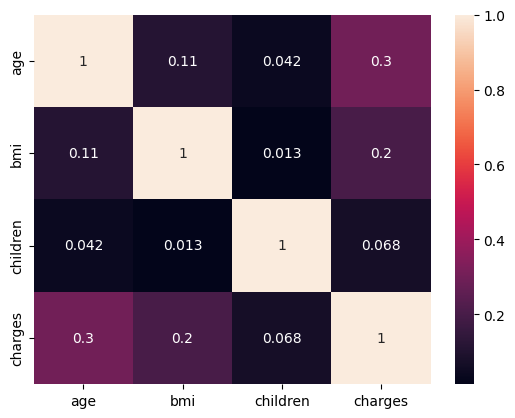

In [13]:
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
insurance_dataset.loc[insurance_dataset['charges'] == 1000, 'charges'] = 50000

In [17]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
insurance_dataset.loc[insurance_dataset['charges'] < 50000, 'price_uchargessd'] = 50000

In [23]:
insurance_dataset.describe()

,age,bmi,children,charges,price_uchargessd
count,1338.000000,1338.000000,1338.000000,1338.000000,1331.0
mean,39.207025,30.663397,1.094918,50040.266491,50000.0
std,14.049960,6.098187,1.205493,643.963511,0.0
min,18.000000,15.960000,0.000000,50000.000000,50000.0
25%,27.000000,26.296250,0.000000,50000.000000,50000.0
50%,39.000000,30.400000,1.000000,50000.000000,50000.0
75%,51.000000,34.693750,2.000000,50000.000000,50000.0
max,64.000000,53.130000,5.000000,63770.428010,50000.0


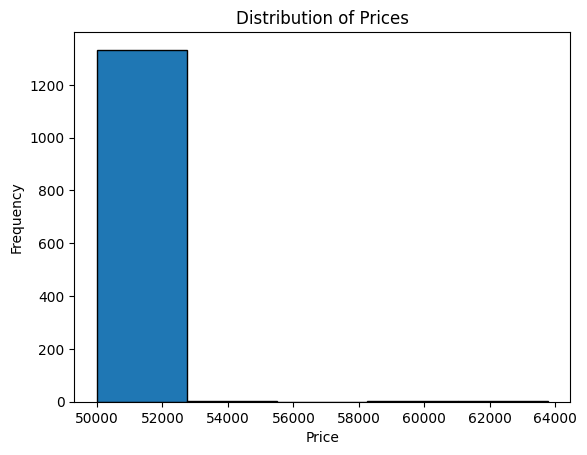

In [45]:
import matplotlib.pyplot as plt

insurance_dataset['charges'].plot(kind = 'hist', bins = 5,  edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [46]:
insurance_dataset.describe(include = 'object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


<Axes: xlabel='age', ylabel='charges'>

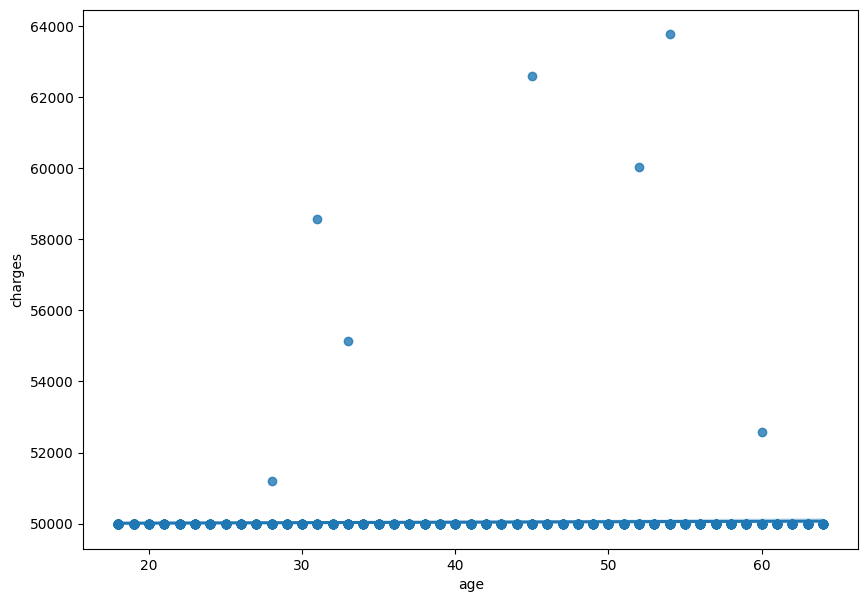

In [47]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.regplot(x="age", y = "charges", data=insurance_dataset)

In [49]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(insurance_dataset['age'], insurance_dataset['charges'])
print("The person Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The person Correlation Coefficient is 0.028365058979057535  with a P-value of P = 0.29983124074932493


<Axes: xlabel='bmi', ylabel='charges'>

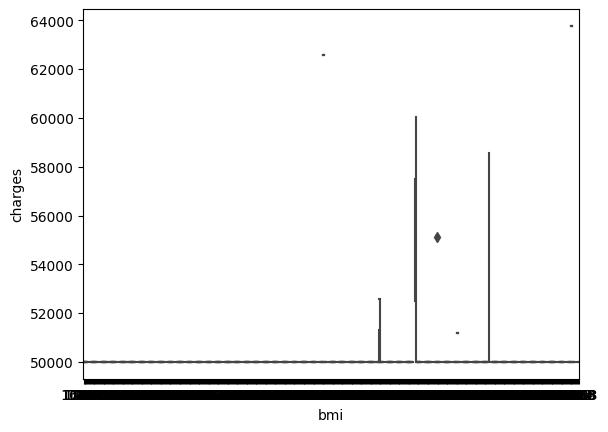

In [52]:
sns.boxplot(x="bmi", y="charges", data=insurance_dataset)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [60]:
print(X)

      age     sex     bmi  children smoker     region  price_uchargessd
0      19  female  27.900         0    yes  southwest           50000.0
1      18    male  33.770         1     no  southeast           50000.0
2      28    male  33.000         3     no  southeast           50000.0
3      33    male  22.705         0     no  northwest           50000.0
4      32    male  28.880         0     no  northwest           50000.0
...   ...     ...     ...       ...    ...        ...               ...
1333   50    male  30.970         3     no  northwest           50000.0
1334   18  female  31.920         0     no  northeast           50000.0
1335   18  female  36.850         0     no  southeast           50000.0
1336   21  female  25.800         0     no  southwest           50000.0
1337   61  female  29.070         0    yes  northwest           50000.0

[1338 rows x 7 columns]


In [61]:
print(Y)

0       50000.0
1       50000.0
2       50000.0
3       50000.0
4       50000.0
         ...   
1333    50000.0
1334    50000.0
1335    50000.0
1336    50000.0
1337    50000.0
Name: charges, Length: 1338, dtype: float64


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 7) (1070, 7) (268, 7)


In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [79]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [80]:
print(X)

      age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1338 rows x 6 columns]


In [81]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [83]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [84]:
regressor = LinearRegression()

In [85]:
regressor.fit(X_train, Y_train)

ValueError: ignored

In [87]:
training_data_prediction =regressor.predict(X_train)

ValueError: ignored

In [88]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

NameError: ignored

In [ ]:
test_data_prediction =regressor.predict(X_test)

In [ ]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

In [ ]:
input_data = (31,1,25.74,0,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
labelencoder1 = LabelEncoder()
training_data_prediction = stats.zscore(training_data_prediction)
test_data_prediction = stats.zscore(test_data_prediction)

In [ ]:
training_data_prediction

In [ ]:
test_data_prediction

In [ ]:
X_train.head()

In [ ]:
Y_train.head()

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(X_train,Y_train)

In [ ]:
Y_pred1 = model_mlr.predict(X_test)

In [ ]:
Y_test[0]

In [ ]:
Y_pred1[0]

In [ ]:
mse1 = mean_squared_error(Y_test, Y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

In [ ]:
mae1= mean_absolute_error(Y_test, Y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

In [ ]:
rf = RandomForestRegressor()
model_rf = rf.fit(X_train,Y_train)

In [ ]:
Y_pred2 = model_rf.predict(X_test)

In [ ]:
mse2 = mean_squared_error(Y_test, Y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

In [ ]:
mae2= mean_absolute_error(Y_test, Y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

In [ ]:
LassoModel = Lasso()
model_lm = LassoModel.fit(X_train,Y_train)

In [ ]:
Y_pred3 = model_lm.predict(X_test)

In [ ]:
mae3= mean_absolute_error(Y_test, Y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

In [ ]:
mse3 = mean_squared_error(Y_test, Y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

In [ ]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [ ]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

In [ ]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()